In [5]:
import os, shutil

In [6]:
import os, shutil

original_dataset_dir = 'C:\\Users\\yang\\Desktop\\dogs-vs-cats\\train'

base_dir = "C:/Users/yang/Desktop/dogs-vs-cats/small/"  # 保存较小数据集的目录

train_dir = os.path.join(base_dir, "train")  #  训练
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')  # 验证
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, "test")  # 测试
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')  # 猫的训练图像目录
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')  # 狗的训练图像目录
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')  # 猫的验证图像目录
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # 狗的验证图像目录
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')  # 猫的测试图像目录
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')  # 狗的测试图像目录
os.mkdir(test_dogs_dir)

# 将前 1000 张猫的图像复制到 train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 将接下里 500 张猫的图像复制到 validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 将接下来 500 张猫的图像复制到 test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# 将前 1000 张狗的图像复制到 train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 将接下里 500 张狗的图像复制到 validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 将接下里 500 张狗的图像复制到 validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
print(len(os.listdir(train_cats_dir)))

1000


In [8]:
type(os.listdir(train_cats_dir))

list

In [9]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [11]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 10s 100ms/step - loss: 0.6888 - acc: 0.5335 - val_loss: 0.6696 - val_acc: 0.6250
Epoch 2/30
100/100 [==============================] - 10s 99ms/step - loss: 0.6617 - acc: 0.6155 - val_loss: 0.6589 - val_acc: 0.5880
Epoch 3/30
100/100 [==============================] - 10s 99ms/step - loss: 0.6129 - acc: 0.6690 - val_loss: 0.6121 - val_acc: 0.6610
Epoch 4/30
100/100 [==============================] - 10s 99ms/step - loss: 0.5639 - acc: 0.7110 - val_loss: 0.5967 - val_acc: 0.6730
Epoch 5/30
100/100 [==============================] - 10s 100ms/step - loss: 0.5346 - acc: 0.7400 - val_loss: 0.5693 - val_acc: 0.7020
Epoch 6/30
100/100 [==============================] - 10s 99ms/step - loss: 0.5032 - acc: 0.7485 - val_loss: 0.5838 - val_acc: 0.6900
Epoch 7/30
100/100 [==============================] - 10s 100ms/step - loss: 0.4730 - acc: 0.7730 - val_loss: 0.5515 -

In [10]:
model.save("cats_and_dogs_small_1.h5")

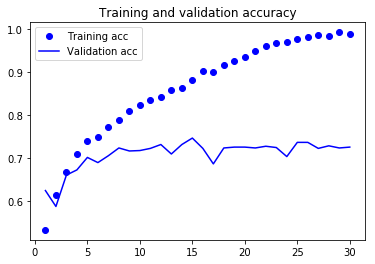

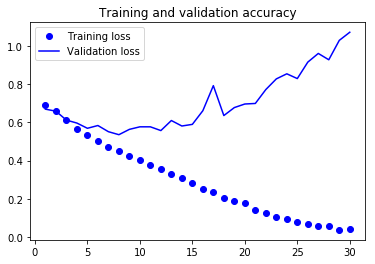

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend()


In [15]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=1.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

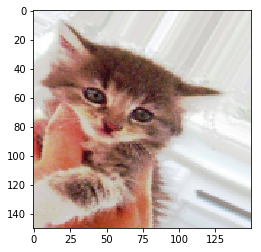

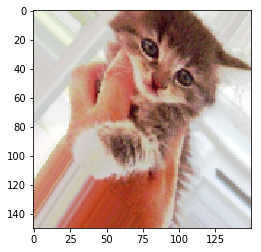

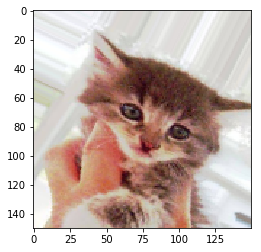

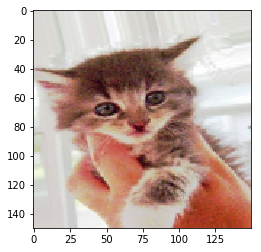

In [21]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)  # 转换成numpy

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4 == 0:
        break
        

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [25]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=1.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 12s 118ms/step - loss: 0.6930 - acc: 0.5245 - val_loss: 0.6854 - val_acc: 0.5260
Epoch 2/100
100/100 [==============================] - 12s 120ms/step - loss: 0.6886 - acc: 0.5470 - val_loss: 0.6683 - val_acc: 0.5790
Epoch 3/100
100/100 [==============================] - 15s 148ms/step - loss: 0.6746 - acc: 0.5690 - val_loss: 0.6811 - val_acc: 0.5710
Epoch 4/100
100/100 [==============================] - 16s 161ms/step - loss: 0.6617 - acc: 0.5960 - val_loss: 0.6510 - val_acc: 0.6010
Epoch 5/100
100/100 [==============================] - 14s 135ms/step - loss: 0.6542 - acc: 0.6140 - val_loss: 0.6641 - val_acc: 0.6000
Epoch 6/100
100/100 [==============================] - 13s 134ms/step - loss: 0.6439 - acc: 0.6210 - val_loss: 0.6127 - val_acc: 0.6470
Epoch 7/100
100/100 [==============================] - 13s 135ms/step - loss: 0.6357 - acc: 0.6385 -

100/100 [==============================] - 14s 135ms/step - loss: 0.4551 - acc: 0.7955 - val_loss: 0.4427 - val_acc: 0.7900
Epoch 61/100
100/100 [==============================] - 14s 136ms/step - loss: 0.4562 - acc: 0.7950 - val_loss: 0.4392 - val_acc: 0.7960
Epoch 62/100
100/100 [==============================] - 14s 135ms/step - loss: 0.4678 - acc: 0.7725 - val_loss: 0.4967 - val_acc: 0.7710
Epoch 63/100
100/100 [==============================] - 14s 136ms/step - loss: 0.4456 - acc: 0.7805 - val_loss: 0.4739 - val_acc: 0.7880
Epoch 64/100
100/100 [==============================] - 14s 136ms/step - loss: 0.4450 - acc: 0.7910 - val_loss: 0.5213 - val_acc: 0.7470
Epoch 65/100
100/100 [==============================] - 14s 136ms/step - loss: 0.4449 - acc: 0.7850 - val_loss: 0.5350 - val_acc: 0.7470
Epoch 66/100
100/100 [==============================] - 14s 137ms/step - loss: 0.4349 - acc: 0.8060 - val_loss: 0.4535 - val_acc: 0.7870
Epoch 67/100
100/100 [==============================] 

In [26]:
model.save("cats_and_dogs_small_2.h5")

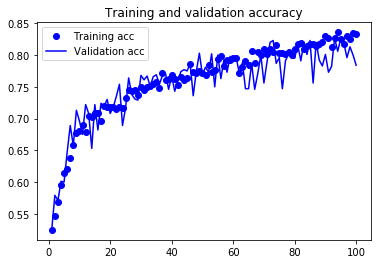

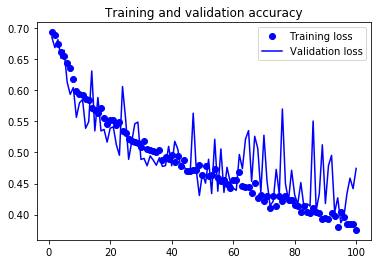

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend()
